In [12]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [13]:
df = pd.read_csv('C:/취업준비/스파르타코딩/머신러닝(주피터노트북)/TeamPJT-3/train_train.csv')
type(df['timestamp'][0])
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['ttimestampp'] = df['year']+df['month']
df['Index'] = df.index

df

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220131,2022-01-31,TG,A,J,0.0,0,2022,1,31,0,2023,0
1,TG_A_S_20220131,2022-01-31,TG,A,S,0.0,0,2022,1,31,0,2023,1
2,TG_B_J_20220131,2022-01-31,TG,B,J,0.0,0,2022,1,31,0,2023,2
3,TG_B_S_20220131,2022-01-31,TG,B,S,0.0,0,2022,1,31,0,2023,3
4,TG_C_J_20220131,2022-01-31,TG,C,J,0.0,0,2022,1,31,0,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43948,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0,2019,1,1,1,2020,43948
43949,BC_E_J_20190101,2019-01-01,BC,E,J,0.0,0,2019,1,1,1,2020,43949
43950,BC_E_S_20190101,2019-01-01,BC,E,S,0.0,0,2019,1,1,1,2020,43950
43951,CB_F_J_20190101,2019-01-01,CB,F,J,0.0,0,2019,1,1,1,2020,43951


In [14]:
TG_data = df[df['item'] == 'TG']
TG_data

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220131,2022-01-31,TG,A,J,0.0,0,2022,1,31,0,2023,0
1,TG_A_S_20220131,2022-01-31,TG,A,S,0.0,0,2022,1,31,0,2023,1
2,TG_B_J_20220131,2022-01-31,TG,B,J,0.0,0,2022,1,31,0,2023,2
3,TG_B_S_20220131,2022-01-31,TG,B,S,0.0,0,2022,1,31,0,2023,3
4,TG_C_J_20220131,2022-01-31,TG,C,J,0.0,0,2022,1,31,0,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,TG_C_S_20190101,2019-01-01,TG,C,S,0.0,0,2019,1,1,1,2020,43919
43920,TG_D_J_20190101,2019-01-01,TG,D,J,0.0,0,2019,1,1,1,2020,43920
43921,TG_D_S_20190101,2019-01-01,TG,D,S,0.0,0,2019,1,1,1,2020,43921
43922,TG_E_J_20190101,2019-01-01,TG,E,J,0.0,0,2019,1,1,1,2020,43922


<Axes: xlabel='supply(kg)', ylabel='price(??kg)'>

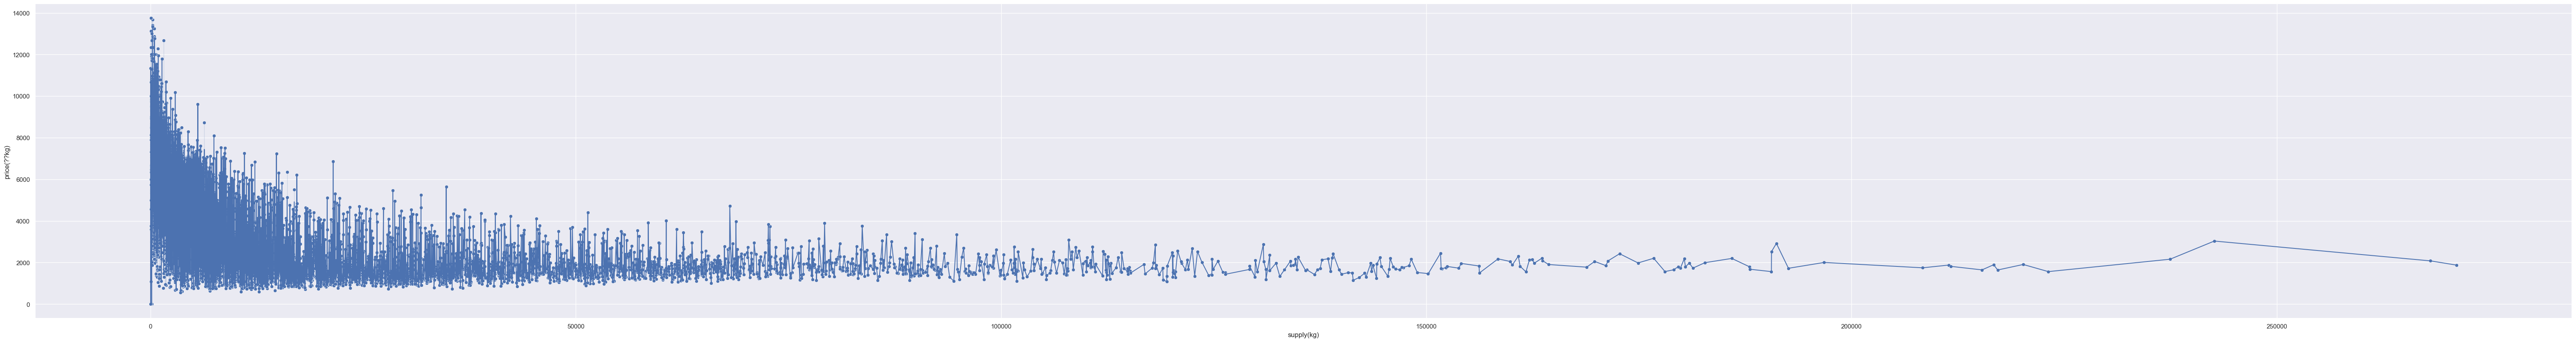

In [15]:
#TG_data.plot()
plt.show()
sns.scatterplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
#plt.figure(figsize=(40,20))

-0.0204936356462617 3416.0988129664597
3416.0783193308134


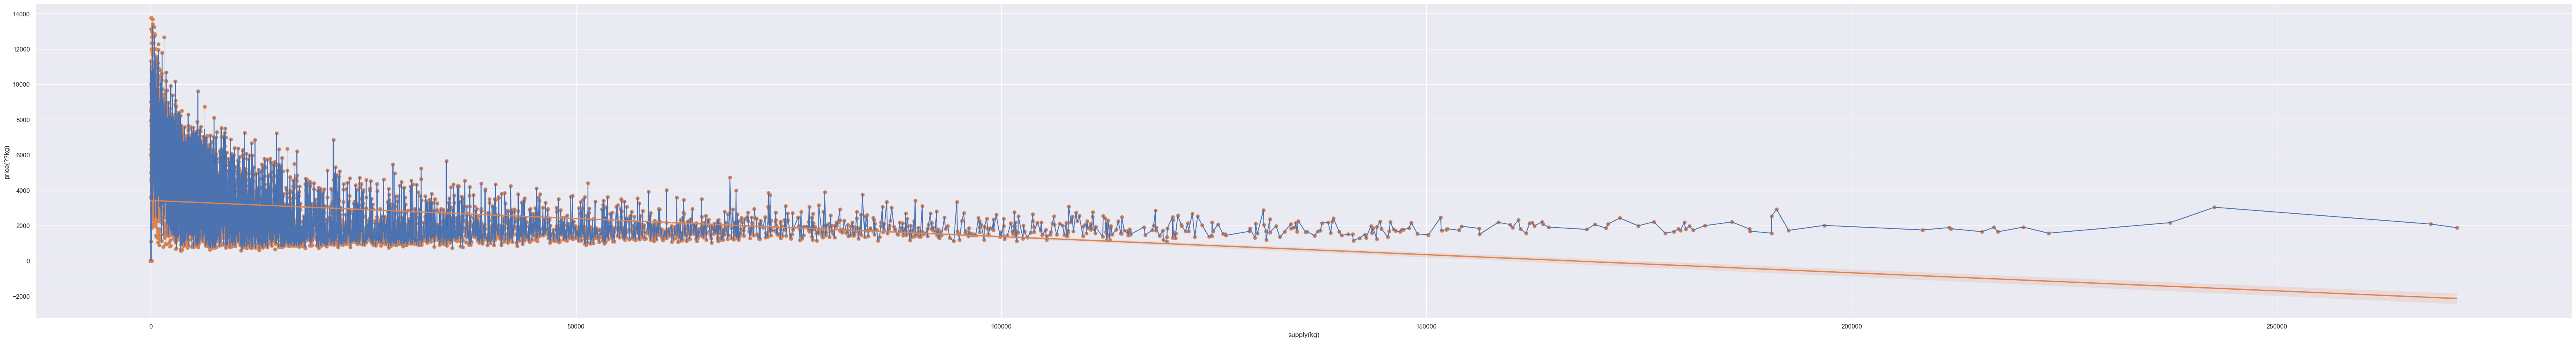

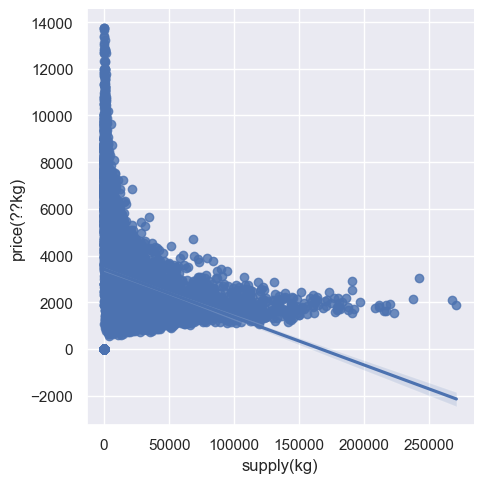

In [16]:
sns.set(rc={"figure.figsize":(80, 10)}) #width=3, #height=4
sns.scatterplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.regplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lmplot( data = TG_data, x = 'supply(kg)' , y = 'price(??kg)')
z=np.polyfit(TG_data['supply(kg)'], TG_data['price(??kg)'], 1)
f=np.poly1d(z)
print(z[0], z[1])
print(f(1))

In [17]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)
prsu_df = TG_data[['supply(kg)', 'price(??kg)']]
model_lr.fit(TG_data[['supply(kg)']], TG_data['price(??kg)'])
y_pred = model_lr.predict(TG_data[['supply(kg)']])


In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(TG_data['price(??kg)'], y_pred)


2328.597310998574

In [19]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(TG_data['price(??kg)'], y_pred)

7521167.806724455

In [20]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(TG_data['price(??kg)'], y_pred) 

In [21]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(TG_data['price(??kg)'], y_pred) 
MSE ** 0.5

2742.47475954191

In [22]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(TG_data['price(??kg)'], y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [ ]:
print(model_lr.intercept_)
r2_score(TG_data['price(??kg)'], y_pred)

1884.2935866201296


0.05992205433053577